In [ ]:
# import pandas, random and numpy
import pandas as pd
from random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make random data
def random_data(n):
    data = []
    cols = ['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang','Cuaca']
    for i in range(n):
        y = randint(1,3)
        if y == 1:
            a = randint(25,30)+float(randint(0,5)*0.1)
            b = randint(20,30)+float(randint(0,2)*0.1)
            c = 1000+randint(6,8)
            d = randint(4,8)+float(randint(0,8)*0.1)
        elif y == 2:
            a = randint(25,28)+float(randint(0,8)*0.1)
            b = randint(20,25)+float(randint(0,2)*0.1)
            c = 1000+randint(8,15)
            d = randint(8,10)+float(randint(0,8)*0.1)
        elif y == 3:
            a = randint(24,26)+float(randint(0,8)*0.1)
            b = randint(25,28)+float(randint(0,2)*0.1)
            c = 1000+randint(4,5)
            d = randint(1,3)+float(randint(0,8)*0.1)
        y = weighted(y)
        data.append([a,b,c,d,y])
    df = pd.DataFrame(data,columns=cols)
    return df

        
def weighted(status):
    if status == 1:
        return "Cerah"
    elif status == 2:
        return "Berawan"
    else:
        return "Hujan"

In [3]:
# call function
data = random_data(500)

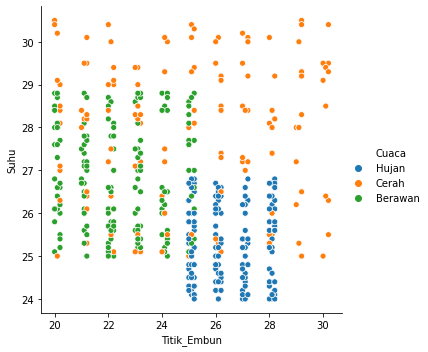

In [4]:
sns.relplot(x="Titik_Embun", y="Suhu", hue="Cuaca", data=data);

In [5]:
print(data['Cuaca'].unique())

['Hujan' 'Cerah' 'Berawan']


In [6]:
print(data.describe())

             Suhu  Titik_Embun  Tekanan_Udara  Jarak_Pandang
count  500.000000   500.000000     500.000000     500.000000
mean    26.617200    24.633800    1007.762000       6.104000
std      1.641003     2.700641       3.337009       3.085194
min     24.000000    20.000000    1004.000000       1.000000
25%     25.300000    22.200000    1005.000000       3.200000
50%     26.400000    25.000000    1007.000000       6.600000
75%     28.000000    27.000000    1010.000000       8.725000
max     30.500000    30.200000    1015.000000      10.800000


In [7]:
print(data['Cuaca'].value_counts())

Berawan    173
Hujan      169
Cerah      158
Name: Cuaca, dtype: int64


In [8]:
data.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang,Cuaca
0,25.2,26.0,1004,2.4,Hujan
1,29.4,25.2,1006,7.5,Cerah
2,25.3,26.1,1008,6.8,Cerah
3,28.4,25.2,1008,5.0,Cerah
4,27.2,22.0,1008,8.0,Cerah


In [9]:
df = data[['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang']]

In [12]:
label = data ['Cuaca']

In [13]:
df.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang
0,25.2,26.0,1004,2.4
1,29.4,25.2,1006,7.5
2,25.3,26.1,1008,6.8
3,28.4,25.2,1008,5.0
4,27.2,22.0,1008,8.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [15]:
train_x, test_x, train_y, test_y = train_test_split(df, label, test_size=0.30, random_state=42)

In [16]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [17]:
pred_y = clf.predict(test_x)

In [18]:
print (pred_y)

['Cerah' 'Hujan' 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Cerah'
 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Hujan' 'Cerah' 'Berawan' 'Hujan'
 'Hujan' 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Cerah' 'Hujan' 'Hujan'
 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Berawan' 'Berawan' 'Berawan'
 'Berawan' 'Berawan' 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Cerah'
 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Cerah' 'Berawan' 'Berawan' 'Hujan'
 'Hujan' 'Cerah' 'Cerah' 'Cerah' 'Cerah' 'Berawan' 'Cerah' 'Berawan'
 'Berawan' 'Berawan' 'Hujan' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Hujan'
 'Berawan' 'Berawan' 'Hujan' 'Cerah' 'Hujan' 'Berawan' 'Berawan' 'Hujan'
 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Hujan'
 'Cerah' 'Hujan' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Hujan' 'Cerah'
 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Berawan' 'Cerah' 'Hujan' 'Cerah'
 'Cerah' 'Cerah' 'Berawan' 'Hujan' 'Berawan' 'Hujan' 'Cerah' 'Berawan'
 'Hujan' 'Berawan' 'Cerah' 'Hujan' 'Hujan' 'Cerah' 'Berawan' 'Berawan'
 'Bera

In [19]:
index = test_x.index.tolist()

In [20]:
score = accuracy_score(test_y,pred_y)
print(score)

0.9866666666666667


In [21]:
akurasiTrain=clf.score(train_x,train_y)
print (akurasiTrain)

0.9828571428571429


In [22]:
akurasiTest=clf.score(test_x,test_y)
print (akurasiTest)

0.9866666666666667


In [23]:
print("Balanced Accuracy :",balanced_accuracy_score(test_y,pred_y))
print("Confusion Matrix :\n",confusion_matrix(test_y,pred_y))
print("Precision, Recall, F1 Score :",precision_recall_fscore_support(test_y,pred_y, average='macro'))

Balanced Accuracy : 0.9862202011850627
Confusion Matrix :
 [[58  1  0]
 [ 1 40  0]
 [ 0  0 50]]
Precision, Recall, F1 Score : (0.9862202011850627, 0.9862202011850627, 0.9862202011850627, None)


In [24]:
hasilAkurasi = []
for i in range (1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    akurasiTest=accuracy_score(test_y,pred_y)
    hasilAkurasi.append(akurasiTest)

In [25]:
print (hasilAkurasi)

[0.98, 0.98, 0.9866666666666667, 0.9933333333333333, 0.9866666666666667, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333]


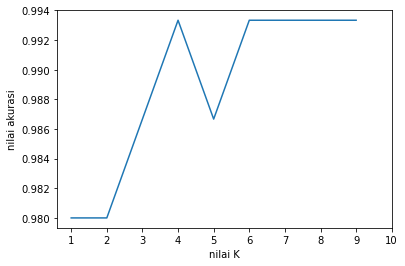

In [26]:
plt.plot(hasilAkurasi)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

Regression

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [83]:
df.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang
0,25.2,26.0,1004,2.4
1,29.4,25.2,1006,7.5
2,25.3,26.1,1008,6.8
3,28.4,25.2,1008,5.0
4,27.2,22.0,1008,8.0


In [84]:
dfRegresi = data[['Suhu','Titik_Embun','Tekanan_Udara']]

In [85]:
labelRegresi = data[['Jarak_Pandang']]

In [86]:
dfRegresi.corr()

,Suhu,Titik_Embun,Tekanan_Udara
Suhu,1.000000,-0.169939,0.256408
Titik_Embun,-0.169939,1.000000,-0.542643
Tekanan_Udara,0.256408,-0.542643,1.000000


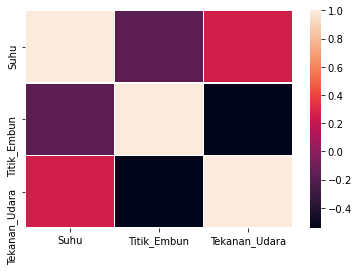

In [87]:
ax = sns.heatmap(dfRegresi.corr(), linewidth=0.5)
plt.show()

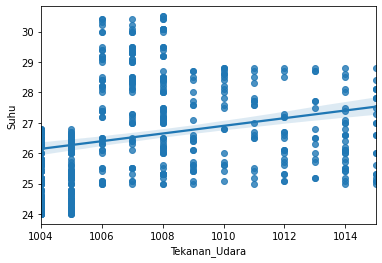

In [88]:
sns.regplot(x="Tekanan_Udara", y="Suhu", data=df) 
# untuk mencari nilai dengan korelasi bagus

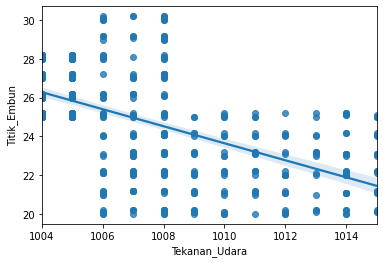

In [89]:
sns.regplot(x="Tekanan_Udara", y="Titik_Embun", data=df) 
# untuk mencari nilai dengan korelasi kurang bagus

In [90]:
labelRegresi = data['Jarak_Pandang']

In [91]:
train_x, test_x, train_y, test_y = train_test_split(dfRegresi, labelRegresi, test_size=0.3, random_state=42)

In [92]:
rgr = KNeighborsRegressor(n_neighbors=3)

In [93]:
rgr.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [94]:
pred_y = rgr.predict(test_x)

In [95]:
print(test_y)

361     7.7
73      2.2
374    10.5
155    10.3
104     8.4
       ... 
266     2.4
23      6.4
222     3.3
261    10.0
426     3.7
Name: Jarak_Pandang, Length: 150, dtype: float64


In [96]:
print(pred_y)

[ 7.83333333  2.8         9.96666667  8.9         9.53333333  9.4
  9.83333333  7.9         2.96666667  9.          9.7         2.76666667
  2.96666667  5.8        10.06666667  1.2         2.96666667  3.03333333
  9.          9.33333333  1.56666667  7.1         2.2         2.73333333
  2.8         9.43333333  8.76666667  1.83333333  9.53333333 10.2
  9.53333333  9.06666667  6.9         3.16666667  6.23333333  2.03333333
  5.96666667  9.76666667  6.96666667  2.3         6.1         2.33333333
  7.56666667  7.2         8.4        10.5         1.53333333  2.16666667
  6.73333333  7.16666667  8.          3.3         9.          6.23333333
  5.96666667  9.8         9.03333333  2.16666667  9.06666667  9.83333333
  8.86666667  1.53333333  2.16666667  9.73333333  9.16666667  1.93333333
  6.66666667  2.06666667  9.1         9.86666667  1.83333333  7.76666667
  2.93333333  7.8         9.36666667  8.86666667  7.63333333  9.56666667
  2.2         5.4         2.36666667  2.23333333  8.83333333  9.1

In [97]:
mean_squared_error(test_y,pred_y)

1.9054592592592592

In [98]:
mean_absolute_error(test_y,pred_y)

1.084666666666667

In [99]:
r2_score(test_y , pred_y)

0.7925704620731504

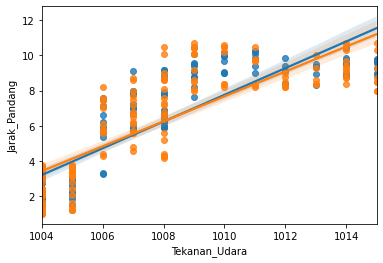

In [100]:
ax = sns.regplot(x=test_x['Tekanan_Udara'],y=pred_y)
sns.regplot(x=test_x['Tekanan_Udara'],y=test_y,ax=ax)

In [101]:
hasilAkurasi = []
for i in range (1,50):
    rgr = KNeighborsRegressor(n_neighbors=i)
    rgr.fit(train_x, train_y)
    pred_y = rgr.predict(test_x)
    akurasiTest=r2_score(test_y,pred_y)
    hasilAkurasi.append(akurasiTest)

In [102]:
print (hasilAkurasi)

[0.7524436192538206, 0.772428620675057, 0.7925704620731504, 0.7998937096686403, 0.8049339034406015, 0.8014081326971033, 0.811899012367286, 0.8199976640318357, 0.820331272372712, 0.8273084687539689, 0.8234548922292038, 0.8234459637897216, 0.8251226409007364, 0.8222977965838737, 0.8202943511401137, 0.8203444305680712, 0.8178136499413498, 0.8161254209110562, 0.818191915030927, 0.816321525984433, 0.8158264216487386, 0.8142441864388117, 0.8122964817693676, 0.8122733959685271, 0.8126607919007675, 0.815781301883937, 0.814668955478059, 0.817058896204824, 0.8161629303820594, 0.8170597705459361, 0.8180678789905291, 0.818376845150258, 0.820408886541293, 0.8226630781017005, 0.823851206989397, 0.8241222437927589, 0.8250128125082542, 0.8251467336217198, 0.8233351027066138, 0.8223502606607842, 0.8218924110867634, 0.821676649056831, 0.8220615626842954, 0.8209984838480131, 0.8201378892636293, 0.821713686172254, 0.8229388077222267, 0.8233337232913414, 0.82408107704006]


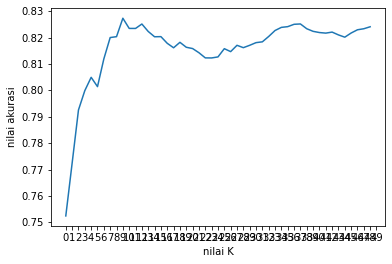

In [103]:
plt.plot(hasilAkurasi)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(50))
plt.show()

In [179]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [180]:
df = data[['Tekanan_Udara','Jarak_Pandang']]

In [181]:
x_array = np.array(df)

In [182]:
scaler = MinMaxScaler()
scaler_min = StandardScaler()
# x_scaled = scaler.fit_transform(x_array)
x_scaled = scaler_min.fit_transform(x_array)

In [183]:
x_scaled

array([[-0.86991923, -1.16584005],
       [-0.86991923, -1.55277667],
       [-0.86991923, -1.23032949],
       [-0.55967699,  0.02721454],
       [ 2.23250312,  0.73659835],
       [ 1.30177642,  0.70435364],
       [ 1.92226089,  1.1557797 ],
       [ 0.68129195,  0.89782195],
       [-0.86991923, -1.10135061],
       [ 0.06080748,  0.02721454],
       [ 0.06080748, -0.06951961],
       [ 0.37104971,  1.28475857],
       [-0.86991923, -1.03686117],
       [-0.24943476,  0.02721454],
       [-1.18016146, -0.87563758],
       [-0.86991923, -1.52053196],
       [-0.55967699, -0.32747736],
       [-0.86991923, -1.29481892],
       [ 0.06080748, -0.71441399],
       [-0.55967699,  0.57537476],
       [-1.18016146, -1.61726611],
       [ 0.68129195,  1.05904554],
       [-0.55967699,  0.05945926],
       [-0.55967699, -0.03727489],
       [-0.24943476,  0.28517229],
       [ 0.68129195,  1.09129026],
       [ 0.06080748, -0.06951961],
       [ 0.06080748,  0.31741701],
       [ 0.06080748,

In [193]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

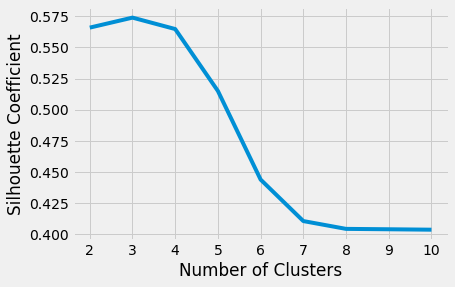

In [194]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [195]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(x_scaled)
score = silhouette_score(x_scaled,kmeans.labels_)

In [196]:
print(score)

0.573908261987368


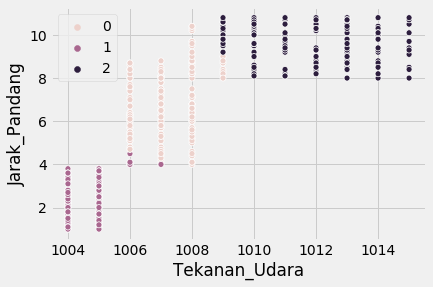

In [200]:
ax=sns.scatterplot(x=df['Tekanan_Udara'], y=df['Jarak_Pandang'], hue=kmeans.labels_)